In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_fam = pd.read_csv('../Data/df_familia_final.csv', sep=',')

In [3]:
df_fam.shape

(96502, 28)

In [4]:
df_fam.columns

Index(['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'id_familia',
       'vlr_renda_media_fam', 'cod_local_domic_fam', 'cod_especie_domic_fam',
       'qtd_comodos_domic_fam', 'qtd_comodos_dormitorio_fam',
       'cod_material_piso_fam', 'cod_material_domic_fam',
       'cod_agua_canalizada_fam', 'cod_abaste_agua_domic_fam',
       'cod_banheiro_domic_fam', 'cod_escoa_sanitario_domic_fam',
       'cod_destino_lixo_domic_fam', 'cod_iluminacao_domic_fam',
       'cod_calcamento_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'ind_parc_mds_fam', 'qtde_pessoas',
       'peso.fam', 'dias_cadastramento', 'dias_atualizacao', 'classe_renda'],
      dtype='object')

## Testes com modelos apenas retirando a variável vlr_renda_media_fam

In [6]:
df_fam = df_fam.drop('vlr_renda_media_fam', axis=1)

In [7]:
df_fam.columns

Index(['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'id_familia',
       'cod_local_domic_fam', 'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'qtde_pessoas', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda'],
      dtype='object')

In [8]:
X = df_fam.iloc[:,:-1]
y = df_fam['classe_renda']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

### K-vizinhos mais próximos

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
knn.score(X_test, y_test)

0.4898709911403554

In [13]:
metrics.f1_score(y_test, knn.predict(X_test), average='weighted')

0.45966113835352257

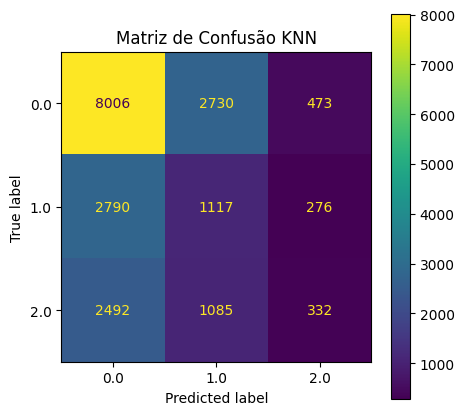

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
cm_display = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=ax, values_format='d')

cm_display.ax_.set_title('Matriz de Confusão KNN')
plt.show()

### Regressão logística

In [15]:
reg_log = LogisticRegression(max_iter=1000)

In [16]:
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
reg_log.score(X_test, y_test)

0.5807471115486245

In [18]:
metrics.f1_score(y_test, reg_log.predict(X_test), average='weighted')

0.42671873964919904

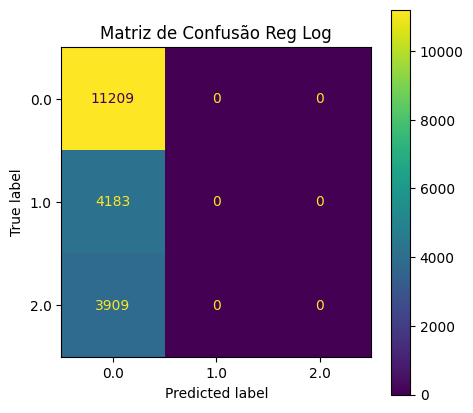

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))
cm_display = ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format='d')

cm_display.ax_.set_title('Matriz de Confusão Reg Log')
plt.show()

### Árvore de decisão

In [20]:
clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

In [21]:
clf.score(X_test, y_test)

0.6175327703227812

In [22]:
metrics.f1_score(y_test, clf.predict(X_test), average='weighted')

0.5283900787649798

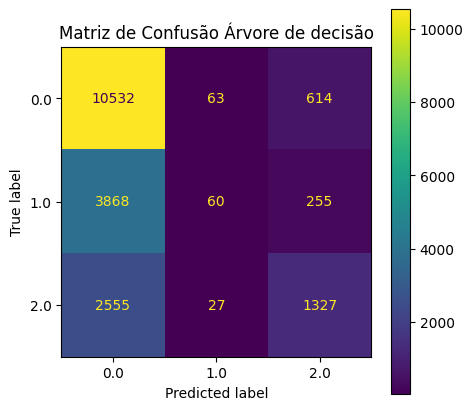

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax, values_format='d')

cm_display.ax_.set_title('Matriz de Confusão Árvore de decisão')
plt.show()

### Random forest

In [24]:
rf_class = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=100).fit(X_train, y_train)

In [25]:
rf_class.score(X_test, y_test)

0.6308999533702917

In [26]:
metrics.f1_score(y_test, rf_class.predict(X_test), average='weighted')

0.544162532625063

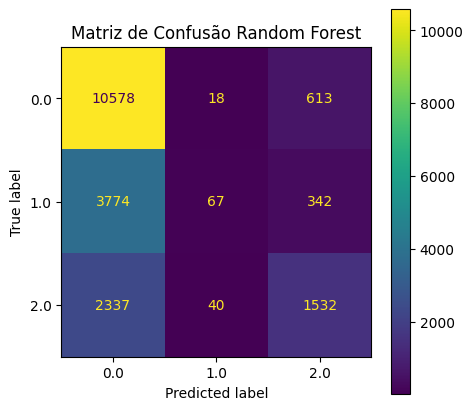

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
cm_display = ConfusionMatrixDisplay.from_estimator(rf_class, X_test, y_test, ax=ax, values_format='d')

cm_display.ax_.set_title('Matriz de Confusão Random Forest')
plt.show()

## Testes com modelos retirando outras variáveis que possam criar ruídos no modelo

In [28]:
df_fam.columns

Index(['cd_ibge', 'uf_ibge', 'regiao_ibge', 'estrato', 'classf', 'id_familia',
       'cod_local_domic_fam', 'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_banheiro_domic_fam',
       'cod_escoa_sanitario_domic_fam', 'cod_destino_lixo_domic_fam',
       'cod_iluminacao_domic_fam', 'cod_calcamento_domic_fam',
       'cod_familia_indigena_fam', 'ind_familia_quilombola_fam',
       'ind_parc_mds_fam', 'qtde_pessoas', 'peso.fam', 'dias_cadastramento',
       'dias_atualizacao', 'classe_renda'],
      dtype='object')

Variáveis a serem retiradas:
- id_familia
- qnt_comodos_domic_fam
- cod_agua_canalizada_fam
- peso.fam 
- dias_cadastramento
- dias_atualizacao

In [29]:
df_fam = df_fam.drop(['id_familia', 'qtd_comodos_domic_fam', 'cod_agua_canalizada_fam', 'peso.fam', 'dias_cadastramento', 'dias_atualizacao'], axis=1)

In [30]:
X = df_fam.iloc[:,:-1]
y = df_fam['classe_renda']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

### K-vizinhos mais próximos

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
knn.score(X_test, y_test)

0.5880006217294441

In [35]:
metrics.f1_score(y_test, knn.predict(X_test), average='weighted')

0.5540410183567172

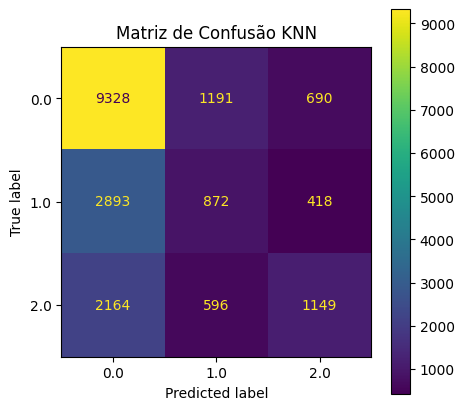

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))
cm_display = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=ax, values_format='d')

cm_display.ax_.set_title('Matriz de Confusão KNN')
plt.show()

### Regressão logística

In [40]:
reg_log = LogisticRegression(max_iter=2000)

In [41]:
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [42]:
reg_log.score(X_test, y_test)

0.6236982539764779

In [43]:
metrics.f1_score(y_test, reg_log.predict(X_test), average='weighted')

0.5518734687468824

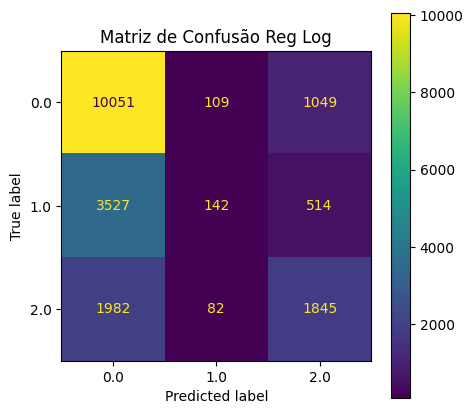

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
cm_display = ConfusionMatrixDisplay.from_estimator(reg_log, X_test, y_test, ax=ax, values_format='d')

cm_display.ax_.set_title('Matriz de Confusão Reg Log')
plt.show()

### Árvore de decisão

In [46]:
clf = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)

In [47]:
clf.score(X_test, y_test)

0.6200196880990623

In [48]:
metrics.f1_score(y_test, clf.predict(X_test), average='weighted')

0.5323373760241243

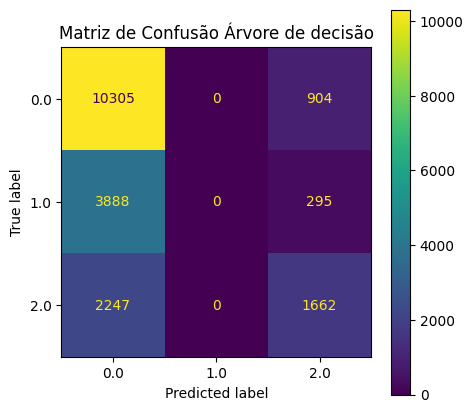

In [49]:
fig, ax = plt.subplots(figsize=(5, 5))
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax, values_format='d')

cm_display.ax_.set_title('Matriz de Confusão Árvore de decisão')
plt.show()

### Random forest

In [50]:
rf_class = RandomForestClassifier(n_estimators=120, max_depth=6, random_state=100).fit(X_train, y_train)

In [51]:
rf_class.score(X_test, y_test)

0.6212113362001969

In [52]:
metrics.f1_score(y_test, rf_class.predict(X_test), average='weighted')

0.5262885134669605

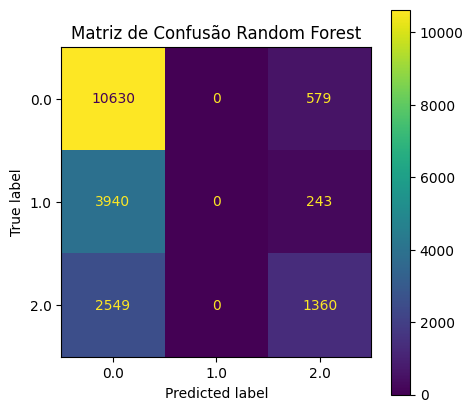

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
cm_display = ConfusionMatrixDisplay.from_estimator(rf_class, X_test, y_test, ax=ax, values_format='d')

cm_display.ax_.set_title('Matriz de Confusão Random Forest')
plt.show()